In [40]:
import glob, json, os
import cv2
from PIL import Image
from tqdm import tqdm_notebook
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


tensor([[9.9925e-01, 7.5487e-04]], grad_fn=<SoftmaxBackward0>)

In [65]:
cn_match_words = {
    "工况描述": ["高速/城市快速路", "城区", "郊区", "隧道", "停车场", "加油站/充电站", "未知"],
    "天气": ["晴天", "雨天", "多云", "雾天", "下雪", "未知"],
    "时间": ["白天", "夜晚", "拂晓/日暮", "未知"],
    "道路结构": ["十字路口", "丁字路口", "上下匝道", "车道汇入", "进出停车场", "环岛", "正常车道", "未知"],
    "一般障碍物": ["雉桶", "水马", "碎石/石块", "井盖", "减速带", "没有"],
    "道路异常情况": ["油污/水渍", "积水", "龟裂", "起伏不平", "没有", "未知"],
    "自车行为": ["直行", "左转", "右转", "停止", "掉头", "加速", "减速", "变道", "其它"],
    "最近的交通参与者": ["行人", "小型汽车", "卡车", "交警", "没有", "未知", "其它"],
    "最近的交通参与者行为": ["直行", "左转", "右转", "停止", "掉头", "加速", "减速", "变道", "其它"],
}

en_match_words = {
"scerario" : ["suburbs","city street","expressway","tunnel","parking-lot","gas or charging stations","unknown"],
"weather" : ["clear","cloudy","raining","foggy","snowy","unknown"],
"period" : ["daytime","dawn or dusk","night","unknown"],
"road_structure" : ["normal","crossroads","T-junction","ramp","lane merging","parking lot entrance","round about","unknown"],
"general_obstacle" : ["nothing","speed bumper","traffic cone","water horse","stone","manhole cover","nothing","unknown"],
"abnormal_condition" : ["uneven","oil or water stain","standing water","cracked","nothing","unknown"],
"ego_car_behavior" : ["slow down","go straight","turn right","turn left","stop","U-turn","speed up","lane change","others"],
"closest_participants_type" : ["passenger car","bus","truck","pedestrain","policeman","nothing","others","unknown"],
"closest_participants_behavior" : ["slow down","go straight","turn right","turn left","stop","U-turn","speed up","lane change","others"],
}

In [66]:
cap = cv2.VideoCapture('./初赛测试视频/41.avi')
img = cap.read()[1]
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = Image.fromarray(image)

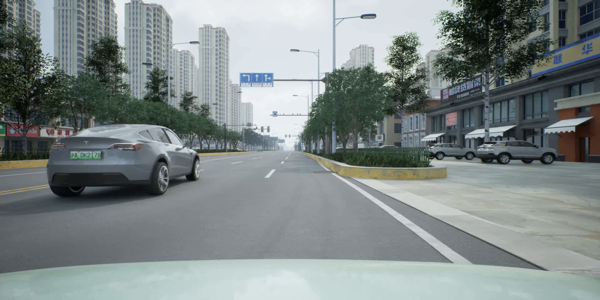

In [67]:
image.resize((600, 300))

In [72]:
submit_json = {
    "作者" : "阿水" ,
    "时间" : "231011",
    "模型名字" : "model_name",
    "测试结果" : []
}

submit_json = {
    "author" : "abc" ,
    "time" : "231011",
    "model" : "model_name",
    "test_results" : []
}

In [73]:
paths = glob.glob('./初赛测试视频/*')
paths.sort()

for video_path in paths:
    print(video_path)
    
    clip_id = video_path.split('/')[-1]
    # clip_id = video_path.split('/')[-1][:-4]
    cap = cv2.VideoCapture(video_path)
    img = cap.read()[1]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    
    single_video_result = {
        "clip_id": clip_id,
        "scerario" : "cityroad",
        "weather":"unknown",
        "period":"night",
        "road_structure":"ramp",
        "general_obstacle":"nothing",
        "abnormal_condition":"nothing",
        "ego_car_behavior":"turning right",
        "closest_participants_type":"passenger car",
        "closest_participants_behavior":"braking"
    }
    
    for keyword in en_match_words.keys():
        if keyword not in ["weather", "road_structure", 'scerario', 'road_structure', 'period']:
            continue
            
        texts = np.array(en_match_words[keyword])
        inputs = processor(text=list(texts), images=image, return_tensors="pt", padding=True)
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
        probs = logits_per_image.softmax(dim=1)  # probs: [[1.2686e-03, 5.4499e-02, 6.7968e-04, 9.4355e-01]]
        single_video_result[keyword] = texts[probs[0].argsort().numpy()[::-1][0]]
        
    submit_json["test_results"].append(single_video_result)

./初赛测试视频/03.avi
./初赛测试视频/04.avi
./初赛测试视频/08.avi
./初赛测试视频/10.avi
./初赛测试视频/11.avi
./初赛测试视频/12.avi
./初赛测试视频/21.avi
./初赛测试视频/22.avi
./初赛测试视频/23.avi
./初赛测试视频/24.avi
./初赛测试视频/25.avi
./初赛测试视频/31.avi
./初赛测试视频/35.avi
./初赛测试视频/36.avi
./初赛测试视频/39.avi
./初赛测试视频/40.avi
./初赛测试视频/41.avi
./初赛测试视频/42.avi
./初赛测试视频/43.avi
./初赛测试视频/44.avi
./初赛测试视频/45.avi
./初赛测试视频/46.avi
./初赛测试视频/47.avi
./初赛测试视频/48.avi
./初赛测试视频/49.avi
./初赛测试视频/50.avi
./初赛测试视频/61.mp4
./初赛测试视频/62.mp4
./初赛测试视频/63.mp4
./初赛测试视频/64.mp4


In [74]:
len(paths)

30

In [75]:
with open('coggle_result.json', 'w', encoding='utf-8') as up:
    json.dump(submit_json, up, ensure_ascii=False)

In [53]:
# "作者" : "abc" ,
# "时间" : "YYMMDD",
# "模型名字" : "model_name",
# "测试结果" :[
# {
# "视频ID" : "xxxx_1",
# "工况描述" : "城市道路",
# "天气":"未知",
# "时间":"夜晚",
# "道路结构":"匝道",
# "一般障碍物":"无",
# "道路异常情况":"无",
# "自车行为":"右转",
# "最近的交通参与者":"小轿车",
# "最近的交通参与者行为":"制动"
# },

submit_json

{'author': 'abc',
 'time': '231011',
 'model': 'model_name',
 'test_results': [{'clip_id': '03.avi',
   'scerario': 'tunnel',
   'weather': 'snowy',
   'period': 'night',
   'road_structure': 'on-ramp/off-ramp',
   'general_obstacle': 'nothing',
   'abnormal_condition': 'nothing',
   'ego_car_behavior': 'turning right',
   'closest_participants_type': 'passenger car',
   'closest_participants_behavior': 'braking'},
  {'clip_id': '04.avi',
   'scerario': 'tunnel',
   'weather': 'snowy',
   'period': 'night',
   'road_structure': 'enter/exit parking lot',
   'general_obstacle': 'nothing',
   'abnormal_condition': 'nothing',
   'ego_car_behavior': 'turning right',
   'closest_participants_type': 'passenger car',
   'closest_participants_behavior': 'braking'},
  {'clip_id': '08.avi',
   'scerario': 'tunnel',
   'weather': 'snowy',
   'period': 'night',
   'road_structure': 'enter/exit parking lot',
   'general_obstacle': 'nothing',
   'abnormal_condition': 'nothing',
   'ego_car_behavior':